In [1]:
fn1 = "Haithem"
ln1 = "Daghmoura"
filename = "_".join(map(lambda s: s.strip().lower(),
                        ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"

In [2]:
filename

'sd-tsia204_lab2_daghmoura_haithem.ipynb'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

## (a)

In [4]:
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
california_housing = fetch_california_housing()

# The data is stored in 'data' attribute, and the target values are in 'target' attribute
X_tild = california_housing.data
ones_column = np.ones((X_tild.shape[0], 1))
X = np.concatenate((ones_column, X_tild), axis=1)

y = california_housing.target

X.shape

(20640, 9)

The estimator is given by :
$$\hat \theta _n  =(X^TX)^{-1}X^TY$$

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

inverse_design = np.linalg.inv(np.transpose(X_train)@X_train)
theta_hat = inverse_design @ X_train.T@y_train
theta_hat

array([-3.70232777e+01,  4.48674910e-01,  9.72425752e-03, -1.23323343e-01,
        7.83144907e-01, -2.02962058e-06, -3.52631849e-03, -4.19792487e-01,
       -4.33708065e-01])

The MSE is given by :     
$$ MSE= \frac 1 n ∑_{i=1}^n (\hat Y_i-Y_i)^2 $$
And the $R^2$ coefficient is given by :         
$$ R^2 = 1-\frac {||\hat Y - \mathbb{1}.\ \bar Y ||^2}{||Y - \mathbb{1}.\ \bar Y ||^2}$$

In [6]:
def MSE(y_true, y_hat):
    return ((y_hat-y_true)**2) .mean()


def R_2(y_true, y_hat):
    y_bar = y_true.mean()
#  numerator =  ((y_hat-y_bar)**2).sum()
    numerator = ((y_hat-y_true)**2).sum()
    denominator = (((y_true-y_bar)**2).sum())
    return 1 - numerator / denominator

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the training set
y_train_pred = X_train@theta_hat

# Make predictions on the test set
y_test_pred = X_test@theta_hat

# Compute Mean Squared Error (MSE) for training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Compute R-squared (R2) coefficient for training and test sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Display the results
print("results computed with sklearn :")
print("MSE - Training set:", mse_train)
print("MSE - Test set:", mse_test)
print("\nR2 - Training set:", r2_train)
print("R2 - Test set:", r2_test)

results computed with sklearn :
MSE - Training set: 0.5179331255246699
MSE - Test set: 0.555891598695057

R2 - Training set: 0.6125511913966952
R2 - Test set: 0.5757877060325938


In [8]:
# Compute Mean Squared Error (MSE) for training and test sets
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

# Compute R-squared (R2) coefficient for training and test sets
r2_train = R_2(y_train, y_train_pred)
r2_test = R_2(y_test, y_test_pred)

# Display the results
print("results with my implementation :")
print("MSE - Training set:", mse_train)
print("MSE - Test set:", mse_test)
print("\nR2 - Training set:", r2_train)
print("R2 - Test set:", r2_test)

results with my implementation :
MSE - Training set: 0.5179331255246699
MSE - Test set: 0.555891598695057

R2 - Training set: 0.6125511913966952
R2 - Test set: 0.5757877060325938


The results from my implementation matchs those from sklearn

## (b)

The expression of the confidence interval of level $1-\alpha$ :     
$$ CI= [\ \hat \theta _{n,k}-Q_{n-p-1}(1-\frac \alpha 2) \hat \sigma_n\frac {(X^TX)^{-1}_{j,j}}{n^{1/2}}\ ; \ \hat \theta _{n,k}+Q_{n-p-1}(1-\frac \alpha 2) \hat \sigma_n\frac {(X^TX)^{-1}_{j,j}}{n^{1/2}}\ ] $$

In [9]:
from scipy.stats import t

# Set the confidence level (alpha)
alpha = 0.01
n, p = X_tild.shape

# Set the degrees of freedom (n - p - 1)
degrees_of_freedom = n - p - 1

# Compute the quantile of order 1 - alpha/2
quantile = t.ppf(1 - alpha / 2, df=degrees_of_freedom)
sigma_hat = ((y_train-y_train_pred)**2).sum()/(n-p-1)
print(
    f"Quantile of order {1 - alpha/2}: {quantile}\nsigma of order {sigma_hat}")

Quantile of order 0.995: 2.5760676330460006
sigma of order 0.41452725358263526


In [10]:
CIs = [(theta_hat[j]-quantile*sigma_hat*np.sqrt(inverse_design[j, j]),
        theta_hat[j]+quantile*sigma_hat*np.sqrt(inverse_design[j, j])) for j in range(9)]
print("For a confidence Intervales at level 99% for the coefficient we get the following ranges : theta_j +- range  in the respective order  ")
for i, conf_int in enumerate(CIs):
    print(f"Coefficient {i}: {CIs[i]}")

For a confidence Intervales at level 99% for the coefficient we get the following ranges : theta_j +- range  in the respective order  
Coefficient 0: (-38.10363406308638, -35.942921348436705)
Coefficient 1: (0.4417200124312202, 0.45562980690119564)
Coefficient 2: (0.008990739073470828, 0.010457775962435564)
Coefficient 3: (-0.13311801582063892, -0.11352866983585348)
Coefficient 4: (0.7338280868166427, 0.8324617267686147)
Coefficient 5: (-9.81546806399998e-06, 5.756226903958076e-06)
Coefficient 6: (-0.0042475345863542055, -0.0028051023879284596)
Coefficient 7: (-0.4315936766520535, -0.40799129651859667)
Coefficient 8: (-0.4460526361817842, -0.4213634937393866)


# Question 2

## (a)

In [13]:
import numpy as np
file_path = 'data.csv'

# Load data from CSV file into an ndarray
data = np.genfromtxt(file_path, delimiter=',')
X = data[:, :-1]
y = data[:, -1]
print(f"This data contains {X.shape[0]} samples and {X.shape[1]} features")

This data contains 442 samples and 210 features


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

# Step 2: Calculate standardization parameters on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: Standardize both training and test sets using the parameters from the training set
X_test_scaled = scaler.transform(X_test)
scaler2 = StandardScaler()
y_bar = y_train.mean()
y_s = y_train.std()
y_train= (y_train-y_bar)/y_s
y_test = (y_test-y_bar)/y_s

## (b)

In [19]:
# Fit a regular OLS

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

theta_hat = regressor.fit(X_train_scaled, y_train)

y_train_pred = regressor.predict(X_train_scaled)
y_test_pred = regressor.predict(X_test_scaled)

print(
    f"R2 coefficient for train set : {regressor.score(X_train_scaled,y_train)}\nR2 coefficient for test set : {regressor.score(X_test_scaled,y_test)}")

R2 coefficient for train set : 0.5442974766640045
R2 coefficient for test set : 0.2613104934195972


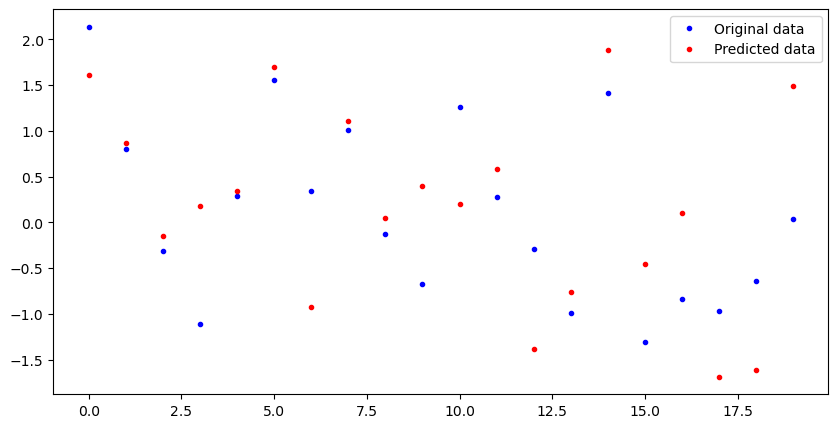

In [20]:
# Plot the original some data and its predicted values in the same figure

plt.figure(figsize=(10, 5))
plt.plot(y_test[:20], 'b.', label='Original data')
plt.plot(regressor.predict(X_test_scaled[:20]), 'r.', label='Predicted data')
plt.legend()
plt.show()

In the train set we have obtained an R2 score = 0.572 which is considered quite low. This is further confirmed by the plot of the test predictions. As we can see most of the points have inaccurate predictions. We noitice aswell that our performance is not good in the test set compared to the training set. This may indicate an overfitting problem since we have too many features. As consequence we will proceed in the next section by feature selection

# Question 3 : Variable selection

In [21]:
def select_variable_step(X, y, mask):
    n, p = X.shape
    best_index = 0
    min_p = 1
    p_value_list = np.ones((p))

    # looping over the features
    for index in range(p):
        if(mask[index] == 0):

            # extracting the selected feature
            X_tild = X[:, index].reshape(n, 1)
            X_current = np.concatenate([np.ones((n, 1)), X_tild], axis=1)

            # obtaining the theta vector through lstsq to avoid numerical instabilities
            theta, _, r, s = np.linalg.lstsq(X_current, y, rcond=None)

            # Gram matrix
            gram_current = X_current.T@X_current

            # empircal estimation of the variance sigma
            sigma_hat = np.sqrt((1/(n-2))) * \
                np.linalg.norm(y-X_current@theta, ord=2)

            # prediction useful for updating y
            prediction = X_current@theta

            # variance of variable j
            s_current = np.sqrt(np.linalg.inv(gram_current)[1, 1])

            # statistic test
            t_value = abs(theta[1]/(s_current*sigma_hat))

            # for level of test when we consider t as the threshold for rejection region
            p_value = 2*(1-t.cdf(t_value, df=n-2))

            # keeping track of the p_values
            p_value_list[index] = p_value
            if (min_p > p_value):
                best_index = index
                min_p = p_value

    return best_index, min_p, prediction, p_value_list


def select_variable(X, y):
    n, p = X.shape
    X_ = X.copy()
    y_ = y.copy()
    S = []
    p_value_lists = []
    # mask will help to identify the selected feature in the original order as they appear in matrix X
    mask = np.zeros((p))

    # verifiying that are still features left
    while (len(S) <= p):
        best_index, min_p, prediction, p_value_list = select_variable_step(
            X_, y_, mask)

        # saving the p_values for each iteration
        p_value_lists.append(p_value_list)

        if(min_p <= 0.05):
            # making the index true in mask is equivalent to deleating the feature from the array in my process
            mask[best_index] = 1
            # save the index of the selected feature
            S.append(best_index)
            y_ = y_ - prediction

        else:
            break

    return S, p_value_lists

**Explain the significance of the p-value in this context :**    <br/><br/>

Intuitevly, the larger the statistic, the more important the effect of the k-th variable.
For each covariate, such a quantity is compared and the largest value is selected this criterion has an interpretaion in terms of p-values. When the test is described by the value of the statistic t and the region of rejection R, the p-value is the smallest value of $\alpha$ for which we still reject. As a consequence, taking the largest t is equivalent totaking the smallest p-value for the underlying test of no effect. Therefore, a stopping rule can be based on the p-value : stop as soon as none of the p-value is smaller than 0.05
<br/><br/>
**Elaborate on the reason for subtracting the residuals :**
<br/><br/>
As soon as one variable $\tilde X_k$ is selected, one needs to account for the predictive information it has briyght in the modelling of Y. This is to prevent from selecting 2 identical covariates. This is done by replacing the output $Y$ by the residual $Y- (1,\tilde X_k)\hat \theta _n$

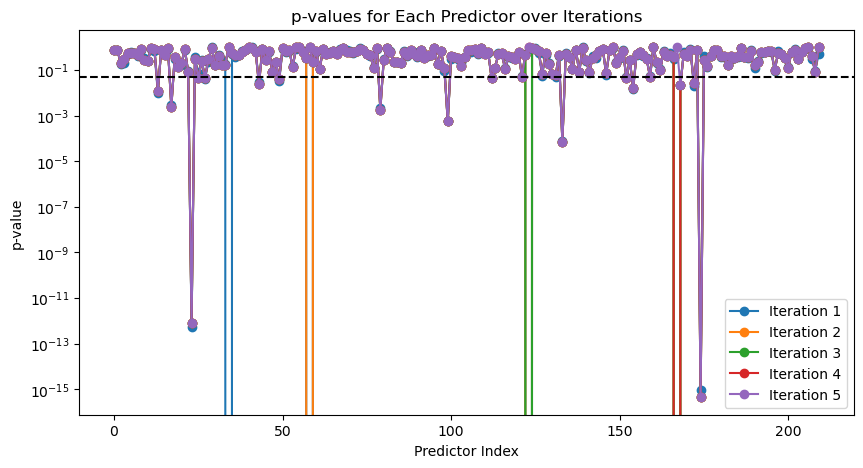

In [22]:
def plot_p_values(p_values_over_iterations):
    plt.figure(figsize=(10, 5))
    for i, p_values in enumerate(p_values_over_iterations):
        plt.plot(p_values, label=f'Iteration {i+1}', marker='o')

    plt.axhline(y=0.05, linestyle='--', color='black')
    plt.xlabel('Predictor Index')
    plt.ylabel('p-value')
    plt.title('p-values for Each Predictor over Iterations')
    plt.legend()
    plt.yscale('log')  # Use logarithmic scale for better visibility
    plt.show()


# Perform forward selection on the synthetic data
result, p_value_lists = select_variable(X_train_scaled, y_train)


# Plot the p-values
plot_p_values(p_value_lists[:5])

In [23]:
print(result)

[34, 58, 123, 167, 174, 23, 133, 99, 79, 17, 13, 154, 168, 43, 172, 49, 152, 112, 27, 25]


After reducing the number of variables with this criteria let's see if our performance actually improved.

In [24]:
X_train_selected = X_train_scaled[:, result]
X_test_selected = X_test_scaled[:, result]
regressor2 = LinearRegression()

theta_hat = regressor2.fit(X_train_selected, y_train)

y_train_pred = regressor2.predict(X_train_selected)
y_test_pred = regressor2.predict(X_test_selected)

print(
    f"R2 coefficient for train set : {regressor2.score(X_train_selected,y_train)}\nR2 coefficient for test set : {regressor2.score(X_test_selected,y_test)}")

R2 coefficient for train set : 0.5704737785827998
R2 coefficient for test set : 0.3248110341495455


Compared to the same OLS estimator with 210 features we achieved $R^2 = 0.57$ score almost the same on the training set but we increased our score on the test set : $R^2_{selected} = 0.325 > R^2_{all} =0.244$ which proves that we had an overfitting problem and we could solve it by reducing the number of variables

# Question 4 ,5,6 :Extensions

In [25]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


def get_coefficients(method, penalties, X, y):
    # Initialize lists to store the results
    test_errors = []
    coefficients = []

    # Loop over penalty values
    for penalty in penalties:

        if method == 'Ridge':
            # Fit ridge regression model
            model = Ridge(alpha=penalty)

        elif method == 'Lasso':
            # Fit LASSO model
            model = Lasso(alpha=penalty)

        elif method == 'ElasticNet':
            # Fit ElasticNet model
            model = ElasticNet(alpha=penalty, l1_ratio=0.5)

        model.fit(X, y)

        # Evaluate train
        test_errors.append(model.score(X_test_scaled, y_test))

        # Store model coefficients
        coefficients.append(model.coef_)

    # Plots
    print(f"best score is : {max(test_errors)}")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'{method} Regression')

    # Plot the evolution of the coefficients
    ax1.plot(penalties, coefficients)
    ax1.set_xlabel('penalties')
    ax1.set_ylabel('coefficients')
    ax1.set_xscale('log')
    ax1.set_title('Evolution of the coefficients')

    # Plot the evolution of the R-squared coefficient
    ax2.plot(penalties, test_errors, color='blue', marker='o')
    ax2.set_xlabel('penalties')
    ax2.set_ylabel('R-squared')
    ax2.set_xscale('log')
    ax2.set_title('Evolution of the R-squared coefficient')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()

## (4) : ridge regression

best score is : 0.3251845720225326


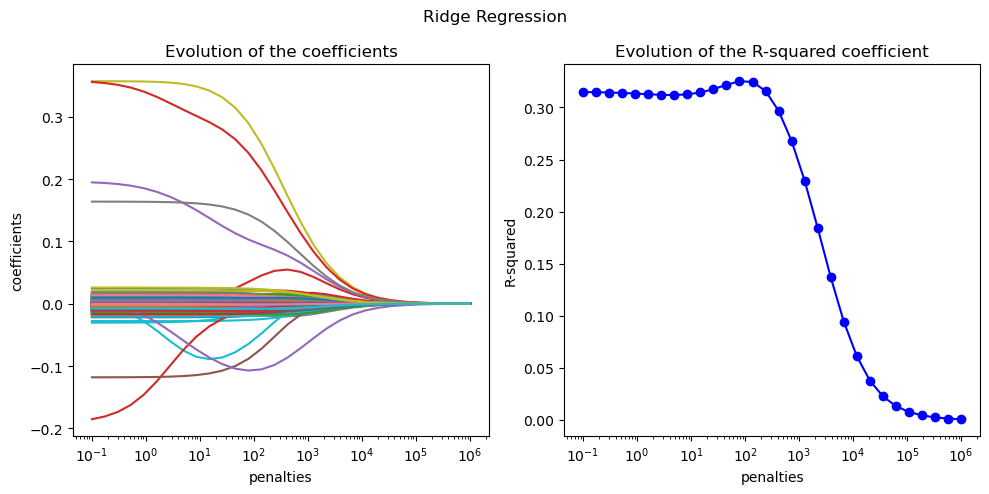

In [26]:
# Define the range of alpha values to test
penalties = np.logspace(-1, 6, 30)
get_coefficients("Ridge", penalties, X_train_scaled, y_train)

## (5) Lasso regression

best score is : 0.341750060731403


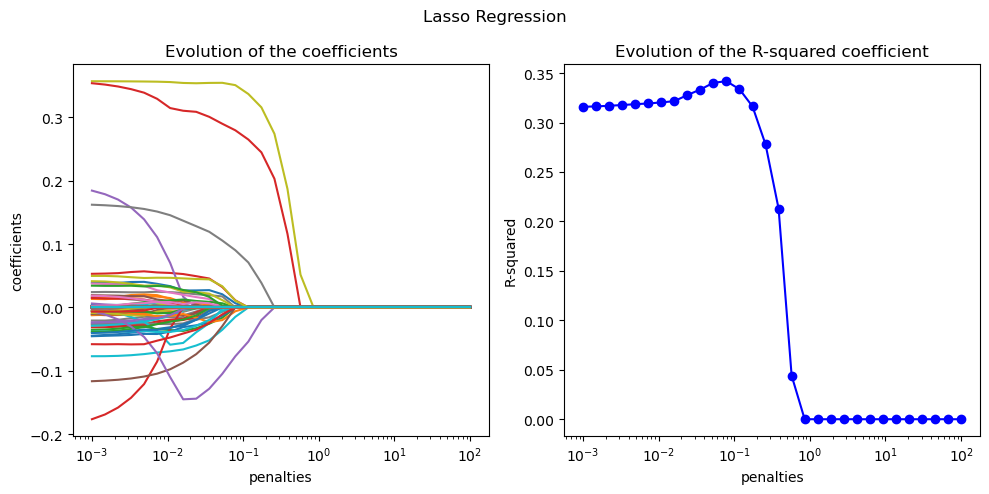

In [27]:
# to ignore indesired warninings due that comes with small values of penalty
import warnings
from sklearn.exceptions import ConvergenceWarning


# Temporarily filter out ConvergenceWarnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    # The actual plotting code
    alphas = np.logspace(-3, 2, 30)
    get_coefficients("Lasso", alphas, X_train_scaled, y_train)

An intressting thing to noitice here for the Lasso regression is that for penalty value = $10^1$

## (6) Elastic-Net regression

best score is : 0.34490800985227044


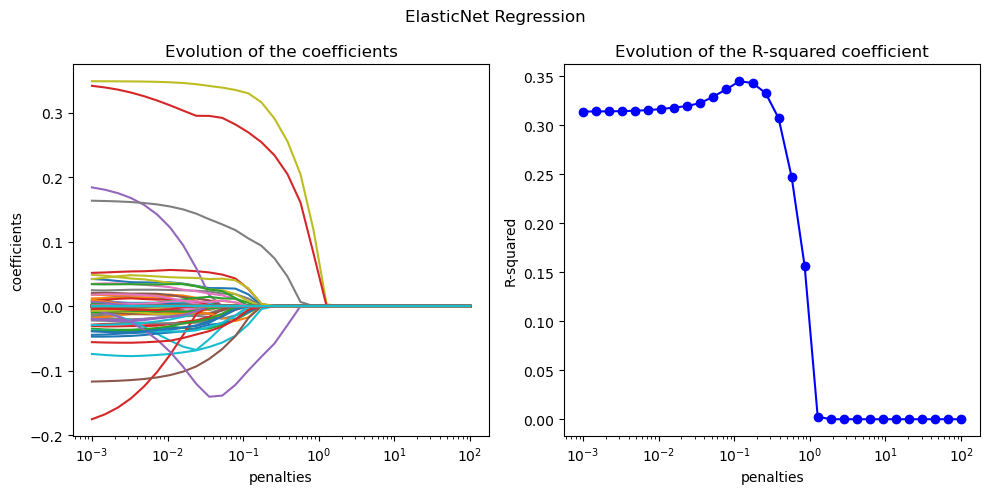

In [28]:
# to ignore indesired warninings due that comes with small values of penalty
import warnings
from sklearn.exceptions import ConvergenceWarning


# Temporarily filter out ConvergenceWarnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)

    # The actual plotting code
    alphas = np.logspace(-3, 2, 30)
    get_coefficients("ElasticNet", alphas, X_train, y_train)

In terms of the plots of evolution of the coefficients we noitice that the lasso in particular is distinguished by the fact of setting to zero the values of coefficients very fast compared to the others.

All of these curves indicates a similar behaviour in terms of the $R^2$ score on the test set : we start from the same value for very small hyperparamter (which is expected since when we set this parmeter to zero we get the same OLS)
and then increases slowly and after reaching a certain maximum it decreases rapidly.


# Question 7

In [29]:
n, p = X_train_scaled.shape

# Compute the covariance matrix
cov_matrix = (1/n)*X_train_scaled.T@X_train_scaled

# svd decomposition
U, s, V = np.linalg.svd(cov_matrix)

## (a)

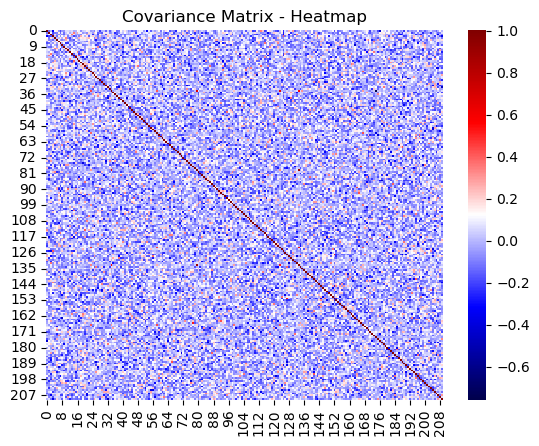

In [30]:
# visualization of the heat map

cov_matrix = np.cov(X_train_scaled, rowvar=False)
sns.heatmap(cov_matrix, cmap='seismic')
plt.title('Covariance Matrix - Heatmap')
plt.show()

As we can see in the heat map above, There is a big number of features that are dependent of each other thus we have alot of redandent information and we are over representing.

## (b)

Principal Component Analysis (PCA) is a dimensionality reduction method aiming to transform high-dimensional data by identifying its principal components, capturing the most significant variance. Through eigenvalue decomposition of the covariance matrix, PCA extracts eigenvectors representing data directions with the highest variance. Selection of principal components allows for data projection into a lower-dimensional space while retaining essential information.

In [31]:
# Principal Components are the columns of V
principal_components = V.T

# projection of data onto principal components
projected = X_train @ principal_components

# Calculate Variance Explained
variance_explained = s**2 / np.sum(s**2)

# Choose number of components k
# Keep components that explain 90% of the variance as was mentioned in the TP
variance_limit = 0.90
cumulative_variance = np.cumsum(variance_explained)
num_components = np.where(cumulative_variance >= variance_limit)[0][0] + 1

# Use first 'num_components' principal components and scores
principal_components_reduced = principal_components[:, :num_components]
projected_reduced = projected[:, :num_components]

## (c)

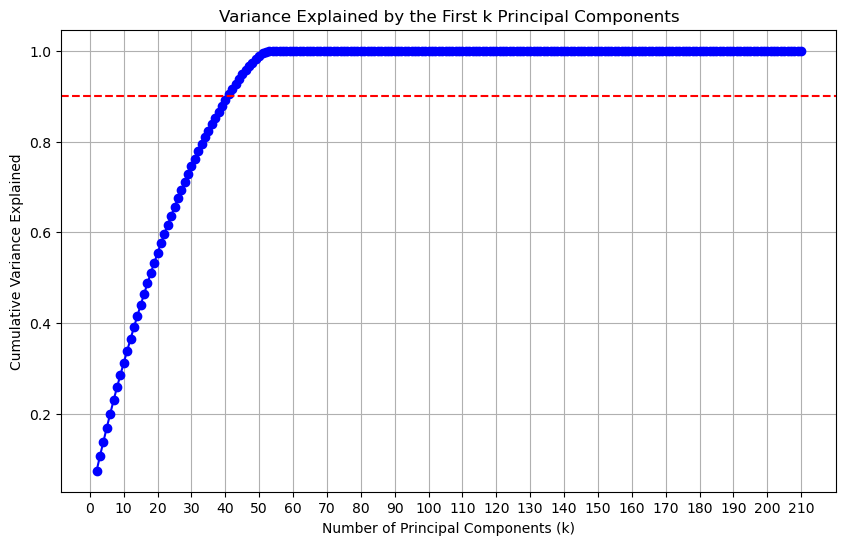

In [32]:
ks = np.arange(2, p+1)

# Plotting the variance explained
plt.figure(figsize=(10, 6))
plt.plot(ks, cumulative_variance[1:], marker='o', color='blue')
plt.axhline(y=0.9, linestyle='--', color='red')
plt.title('Variance Explained by the First k Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(np.arange(0, p+1, 10))  # Show only multiples of 10 on the x-axis
plt.grid(True)
plt.show()

In [33]:
# Output results
print(
    f"number of Principal Components for {round(cumulative_variance[num_components-1],3)} % explained variance is : ", num_components)

number of Principal Components for 0.904 % explained variance is :  41


## (d)

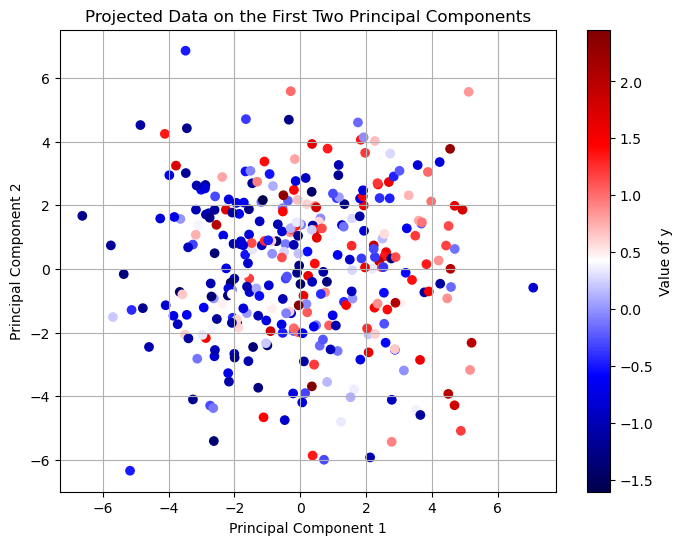

In [34]:
# Project data onto the first two principal components
k = 2
projected_data = projected[:, :2]

# Plotting the projected data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    projected_data[:, 0], projected_data[:, 1], c=y_train, cmap='seismic')
plt.colorbar(scatter, label='Value of y')
plt.title('Projected Data on the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


First we noitice that the data is quiet spread. The distribution of data along the axes of principal components serves as an indicator of the variance encapsulated by each component. A broader dispersion along a specific axis implies a greater degree of variance attributed to that particular component.

Second, we can see the emergence of distinct clusters and patterns within the data. This hints at the existence of subgroups sharing common characteristics. For instance, the grouping of similar values of the dependent variable (y) by specific colors suggests a collective trait among corresponding data points.

Third we can analyse the color gradient. The presence of a gradual change in color along a particular direction suggests a potential correlation between the dependent variable (y) and the structural features captured by principal components. For instance, a directional shift of darker colors (indicating higher y values) may signify an upward trend along the corresponding principal component.

## (e)

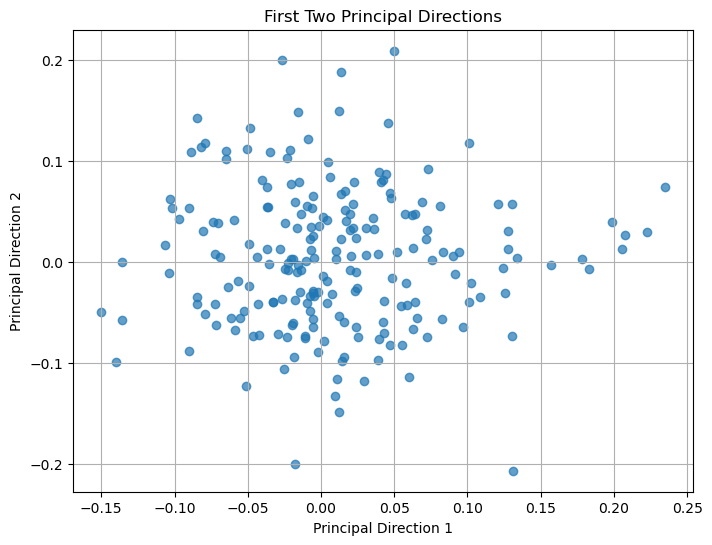

In [35]:
# Plotting the first two principal directions
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.title('First Two Principal Directions')
plt.xlabel('Principal Direction 1')
plt.ylabel('Principal Direction 2')
plt.grid(True)
plt.show()

This plots can be viewed as Direction 2 as a function of Direction 1 coordinate vectors.
Since we have p= 210 , we are plotting the relationship between the respective coordinates of Direction 1 and Direction 2. For instance a point in this plot of coordinates (x_point,y_point) means that there exists an index i such that direction1[i] = x_point and direction2[i] = y_point. An other example is when we have overlapping points, this means that there are severl indices with the same (x_point,y_point)

## f

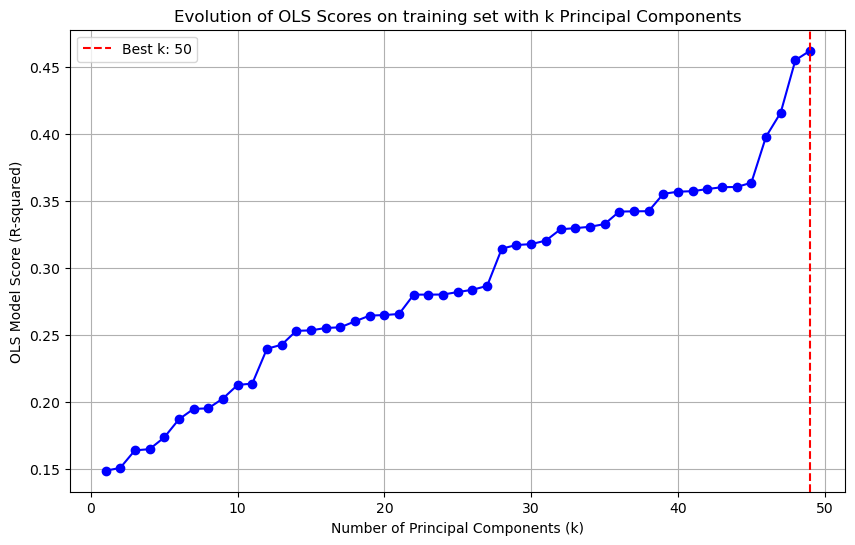

(49, 0.4617929439124159)

In [36]:
# Initialize lists to store results
k_values = list(range(1, 50))
scores = []

# Loop over the number of components k
for k in k_values:
    # Project the data onto k principal components
    X_train_pca = np.dot(X_train_scaled, V.T[:, :k])
    X_test_pca = np.dot(X_test_scaled, V.T[:, :k])

    # Run OLS regression on the projected data
    model = LinearRegression()
    model.fit(X_train_pca, y_train)

    # Predict on the test data
    y_pred = model.predict(X_train_pca)

    # Calculate the score (e.g., R-squared) and append to the list
    score = r2_score(y_train, y_pred)
    scores.append(score)

# Select k with the best score
best_score = max(scores)
best_k = k_values[scores.index(best_score)]

# Plot the evolution of scores with k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', color='blue')
plt.title('Evolution of OLS Scores on training set with k Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('OLS Model Score (R-squared)')
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k: {best_k+1}')
plt.legend()
plt.grid(True)
plt.show()

# Output the best k and the corresponding score
best_k, best_score

This plot shows the expected behaviour : The more component we take into consideration the more we are fitting our model to the training set the better the $R^2$ score that we get on the training set.

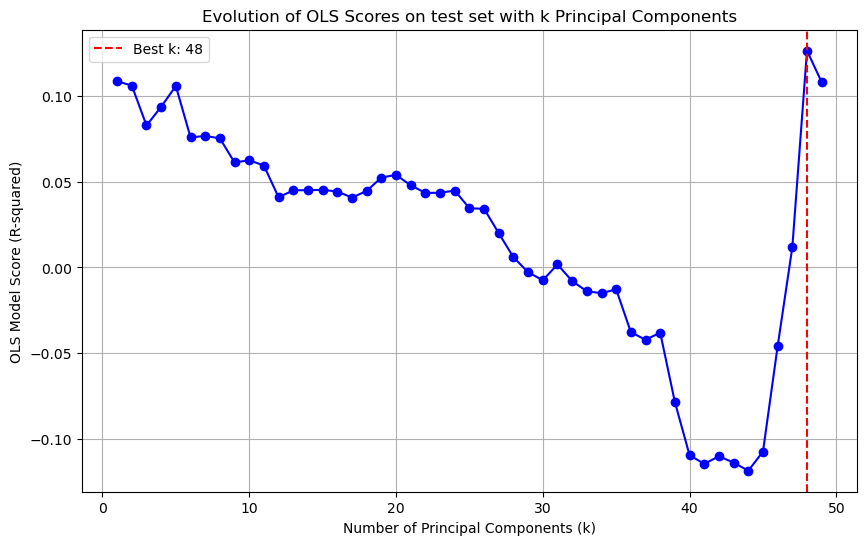

best_k = 48, best_score=0.12640483165129468


In [37]:
# Initialize lists to store results
k_values = list(range(1, 50))
scores = []

# Loop over the number of components k
for k in k_values:
    # Project the data onto k principal components
    X_train_pca = projected[:, :k]
    X_test_pca = (X_test_scaled @ V.T)[:, :k]

    # Run OLS regression on the projected data
    model = LinearRegression()
    model.fit(X_train_pca, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test_pca)

    # Calculate the score (e.g., R-squared) and append to the list
    score = r2_score(y_test, y_pred)
    scores.append(score)

# Select k with the best score
best_score = max(scores)
best_k = k_values[scores.index(best_score)]

# Plot the evolution of scores with k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o', color='blue')
plt.title('Evolution of OLS Scores on test set with k Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('OLS Model Score (R-squared)')
plt.axvline(best_k, color='r', linestyle='--', label=f'Best k: {best_k}')
plt.legend()
plt.grid(True)
plt.show()

# Output the best k and the corresponding score
print(f"best_k = {best_k}, best_score={best_score}")

Here we see that the previous property doesn't hold. By adding more components we don't neccessary get an increase of the $R^2$ score on the test set.

# Question 8


Here's a summary of the results and key features of each model:
<br/><br/>
**OLS (Ordinary Least Squares):**

-Traditional linear regression method.

-Straightforward interpretation of coefficients.

-Sensitive to multicollinearity in predictor variables.
<br/><br/>

**Variable selection**

-Promotes the reduction of the number of variables in order to keep only the releveant ones

-Based on a statistical test
<br/><br/>
**Ridge Regression:**

-Addresses multicollinearity by introducing a penalty term to the least squares objective.

-Suitable for scenarios with high collinearity among predictor variables.

-Controls overfitting by adding a regularization term (L2 norm) to the loss function.
<br/><br/>
**Lasso Regression:**


-Promotes sparsity in coefficient estimates, leading to feature selection.

-Effective for datasets with a large number of features, automatically setting some coefficients to zero.

-May be less robust to multicollinearity compared to Ridge.
<br/><br/>
**ElasticNet:**

-Combines features of Ridge and Lasso by adding both L1 and L2 regularization terms.

-Achieves a balance between feature selection and handling multicollinearity.

-Requires tuning of hyperparameters for optimal performance.
<br/><br/>
**PCR (Principal Component Regression):**

-Addresses multicollinearity by transforming features into principal components.

-Reduces dimensionality and captures variance in the data.

-Requires determining the number of principal components to use.
<br/><br/>
**Results and Evaluation:**

So far, The R2 score on the test set is practically the same for the ridge model, the Lasso model, the elastic model and the one we got from fitting an ols on the selected variables with the best performant model being the Lasso with R_2 score = 0.341. However the PCA analysis gave poor results on the test set.
<br/><br/>
Having this in mind we need to consider the trade-offs between model complexity, interpretability, and predictive performance.

In conclusion, the choice of the optimal model depends on the dataset's characteristics and the specific goals of the analysis. Ridge, Lasso, and ElasticNet provide regularization techniques to handle multicollinearity and prevent overfitting, while PCR addresses these issues through dimensionality reduction. The final decision should consider the balance between model complexity and performance.